# Packages

In [120]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import sklearn.cluster as sklc
import sklearn.metrics as sklm
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy.stats import ttest_ind
import math
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sms
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
%matplotlib inline 
import matplotlib.patches as mpatches

# Read Files

In [2]:
df= pd.read_excel('data/employment-rate-ethnic-borough.xlsx', sheet_name='2019', skiprows=[0, 2], nrows=33, index_col=0)

## Data Cleaning

In [3]:
df.fillna(0, inplace=True)

In [4]:
df.replace("!", "0", inplace=True)

In [5]:
df.replace("*", "0", inplace=True)

In [6]:
df.replace("-", "0", inplace=True)

In [7]:
cols = ['Code', 'Area', 'number', 'denominator', 'percent', 'confidence', 'number.1', 'denominator.1', 'percent.1', 'confidence.1']

In [8]:
intcols = ['number', 'denominator', 'percent', 'confidence', 'number.1', 'denominator.1', 'percent.1', 'confidence.1']

In [9]:
#Fixing integer to float
for i in intcols:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('int').astype('float')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        df[i] = df[i].astype('int').astype(pd.UInt16Dtype())

Converting number
Converting denominator
Converting percent
Converting confidence
Converting number.1
Converting denominator.1
Converting percent.1
Converting confidence.1


In [10]:
df.head(3)

,Area,number,denominator,percent,confidence,number.1,denominator.1,percent.1,confidence.1,number.2,...,percent.4,confidence.4,number.5,denominator.5,percent.5,confidence.5,number.6,denominator.6,percent.6,confidence.6
Code,,,,,,,,,,,,,,,,,,,,,
E09000001,City of London,7400.0,8500.0,87.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
E09000002,Barking and Dagenham,50300.0,70900.0,71.0,9.0,45400.0,66300.0,68.0,10.0,0,...,64.7,19.8,24000,34200,70.4,14.3,4000,5300,74.6,36
E09000003,Barnet,129400.0,168000.0,77.0,8.0,62100.0,91200.0,68.0,12.0,6200,...,60.4,0,13100,16900,78,25.2,30900,50600,61.1,17.2


In [11]:
df_clean = df.filter(cols, axis=1)

In [12]:
df_clean.shape

(33, 9)

In [13]:
#Ensuring NaN values
df_clean.isnull().sum(axis=0).sort_values(ascending=True)[:12]

Area             0
number           0
denominator      0
percent          0
confidence       0
number.1         0
denominator.1    0
percent.1        0
confidence.1     0
dtype: int64

In [14]:
#Rename columns
df_clean.rename(columns={'number':'white_number', 'denominator': 'white_denominator', 'percent': 'white_percent', 
                         'confidence': 'white_confidence', 'number.1':'minor_number', 
                         'denominator.1': 'minor_denominator', 'percent.1': 'minor_percent', 'confidence.1': 'minor_confidence'},
                inplace=True)

In [15]:
df_clean.drop('E09000001', inplace=True)
#Because City of London does not have record for minorities

In [16]:
df_clean.head(3)

,Area,white_number,white_denominator,white_percent,white_confidence,minor_number,minor_denominator,minor_percent,minor_confidence
Code,,,,,,,,,
E09000002,Barking and Dagenham,50300.0,70900.0,71.0,9.0,45400.0,66300.0,68.0,10.0
E09000003,Barnet,129400.0,168000.0,77.0,8.0,62100.0,91200.0,68.0,12.0
E09000004,Bexley,97000.0,126800.0,76.0,6.0,21600.0,29700.0,72.0,14.0


In [17]:
del df

# Descriptive Statistics

## White Employment Rate

In [18]:
df_clean["white_percent"].head(33)

Code
E09000002    71.0
E09000003    77.0
E09000004    76.0
E09000005    81.0
E09000006    80.0
E09000007    81.0
E09000008    77.0
E09000009    79.0
E09000010    67.0
E09000011    81.0
E09000012    82.0
E09000013    82.0
E09000014    79.0
E09000015    70.0
E09000016    74.0
E09000017    77.0
E09000018    74.0
E09000019    82.0
E09000020    73.0
E09000021    83.0
E09000022    78.0
E09000023    83.0
E09000024    85.0
E09000025    81.0
E09000026    74.0
E09000027    82.0
E09000028    84.0
E09000029    78.0
E09000030    87.0
E09000031    79.0
E09000032    83.0
E09000033    76.0
Name: white_percent, dtype: float64

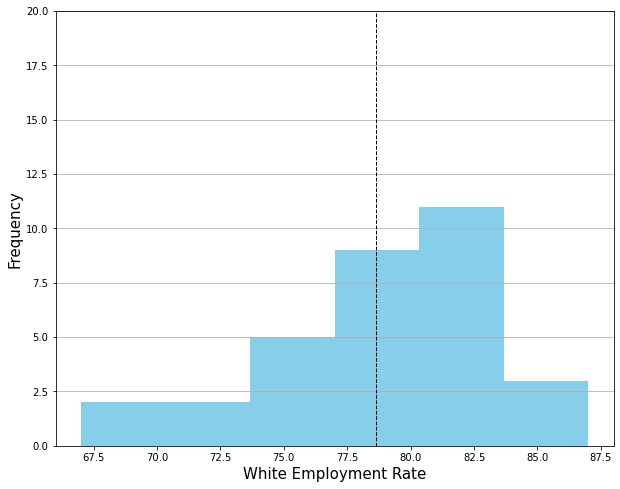

In [19]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=df_clean["white_percent"], bins='auto', color="skyblue",
                            alpha=1, rwidth=1)
plt.grid(axis='y', alpha=1)
plt.xlabel('White Employment Rate', size=15)
plt.ylabel('Frequency',size=15)
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.axvline(df_clean["white_percent"].mean(), color='k', linestyle='dashed', linewidth=1)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


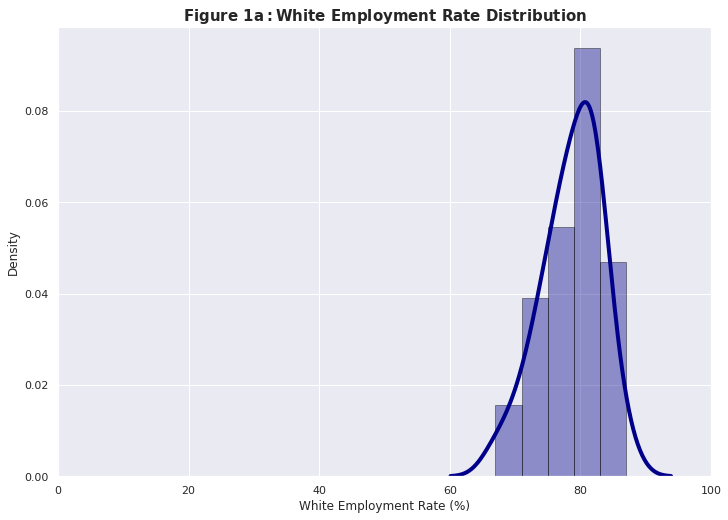

In [145]:
#After removing outliers

sns.distplot(df_clean["white_percent"], hist=True, kde=True, 
             bins=5, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             axlabel='White Employment Rate (%)',
             kde_kws={'linewidth': 4})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlim(0, 100)
plt.title(r"$\bf{" + 'Figure \ 1a: White \ Employment \ Rate \ Distribution' + "}$", loc='center', fontsize= 15)
plt.savefig('Figure1a.png')

In [21]:
df_clean['white_percent'].describe()

count    32.000000
mean     78.625000
std       4.591366
min      67.000000
25%      76.000000
50%      79.000000
75%      82.000000
max      87.000000
Name: white_percent, dtype: float64

In [22]:
print( 'Kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df_clean['white_percent']) ))
print( 'Skewness of normal distribution (should be 0): {}'.format( skew(df_clean['white_percent']) ))

#Positive kurtosis value indicates that the distribution has heavier tails than the normal distribution

#Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. 
#The mean and median will be less than the mode.

Kurtosis of normal distribution (should be 0): -0.09102537159395396
Skewness of normal distribution (should be 0): -0.5814448290090003


In [23]:
statistics.stdev(df_clean['white_percent'])
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(df_clean['white_percent']))) 

Standard Deviation of sample is 4.591366371930073 


## Minorities Employment Rate

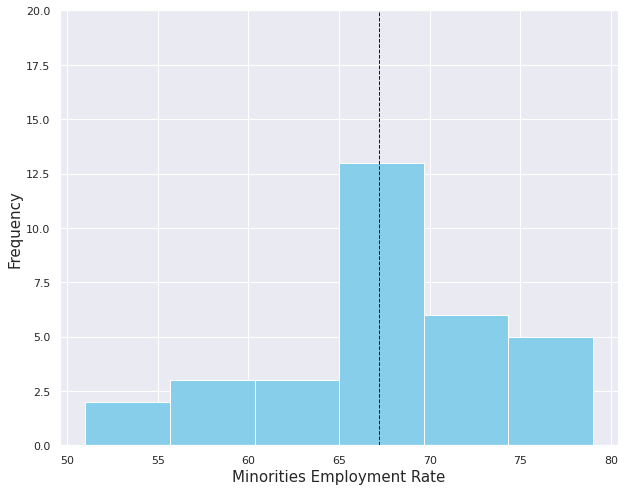

In [24]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=df_clean["minor_percent"], bins='auto', color="skyblue",
                            alpha=1, rwidth=1)
plt.grid(axis='y', alpha=1)
plt.xlabel('Minorities Employment Rate', size=15)
plt.ylabel('Frequency',size=15)
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.axvline(df_clean["minor_percent"].mean(), color='k', linestyle='dashed', linewidth=1)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


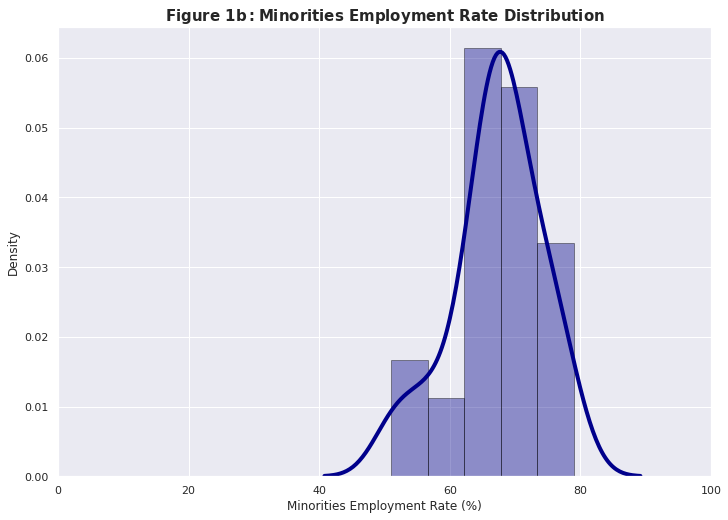

In [144]:
#After removing outliers

sns.distplot(df_clean["minor_percent"], hist=True, kde=True, 
             bins=5, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             axlabel='Minorities Employment Rate (%)',
             kde_kws={'linewidth': 4})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlim(0, 100)
plt.title(r"$\bf{" + 'Figure \ 1b: Minorities \ Employment \ Rate \ Distribution' + "}$", loc='center', fontsize= 15)
plt.savefig('Figure1b.png')

In [26]:
df_clean['minor_percent'].describe()

count    32.00000
mean     67.18750
std       6.79866
min      51.00000
25%      64.50000
50%      67.50000
75%      72.00000
max      79.00000
Name: minor_percent, dtype: float64

In [27]:
print( 'Kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df_clean['minor_percent']) ))
print( 'Skewness of normal distribution (should be 0): {}'.format( skew(df_clean['minor_percent']) ))

#Positive kurtosis value indicates that the distribution has heavier tails than the normal distribution

#Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. 
#The mean and median will be less than the mode.

Kurtosis of normal distribution (should be 0): 0.1377230379010581
Skewness of normal distribution (should be 0): -0.5859492031909127


In [28]:
statistics.stdev(df_clean['minor_percent'])
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(df_clean['minor_percent']))) 

Standard Deviation of sample is 6.798659735091055 


# Hypothesis Testing

In [29]:
stat, p = ttest_ind(df_clean['white_percent'], df_clean['minor_percent'])
print('t=%.3f, p=%.3f' % (stat, p))

#T-test value greater than 2 and and p-value is less than 0.05 show that the null hypothesis is rejected and the difference is significant
#There is sufficient evidence to conclude that 
#there is a significant linear relationship between  𝑥  and  𝑦  because the correlation coefficient is significantly different from zero

t=7.887, p=0.000


# Residuals Analysis

r-squared: 0.003319218528246397 


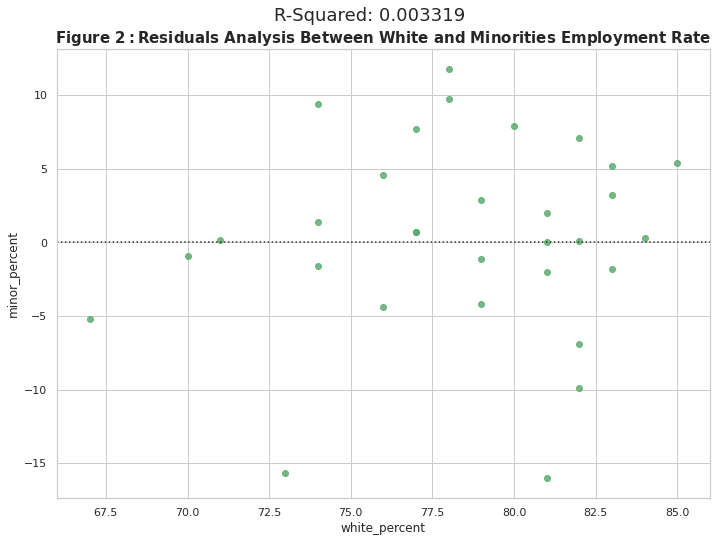

In [153]:
sns.set_theme(style="whitegrid")

x = df_clean['white_percent']
y = df_clean['minor_percent']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: % s " % (r_value**2))

sns.residplot(x=x, y=y, lowess=False, color="g")
title_string = "R-Squared: % s " % round((r_value**2), 6)
plt.xlim(66, 86)
plt.suptitle(title_string, x= 0.5, y=0.95, fontsize=18)
plt.title(r"$\bf{" + 'Figure \ 2: Residuals \ Analysis \ Between \ White \ and \ Minorities \ Employment \ Rate' + "}$", loc='center', fontsize= 15)
plt.savefig('Figure2.png')

In [ ]:
# they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot.
# in general, there aren’t any clear patterns and roughly form a horizontal line around residual. 
# It indicates the equal variance of residual for all x values
# We did not conduct the removal of outliers, it is because there is no significant outliers in the residuals plot

# Clustering Analysis

## Elbow Method

In [32]:
dfCluster = df_clean.filter(['white_percent', 'minor_percent'], axis=1)

In [38]:
dfCluster

,white_percent,minor_percent
Code,,
E09000002,71.0,68.0
E09000003,77.0,68.0
E09000004,76.0,72.0
E09000005,81.0,67.0
E09000006,80.0,75.0
E09000007,81.0,51.0
E09000008,77.0,75.0
E09000009,79.0,66.0
E09000010,67.0,63.0


In [34]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfCluster)
    distortions.append(kmeanModel.inertia_)

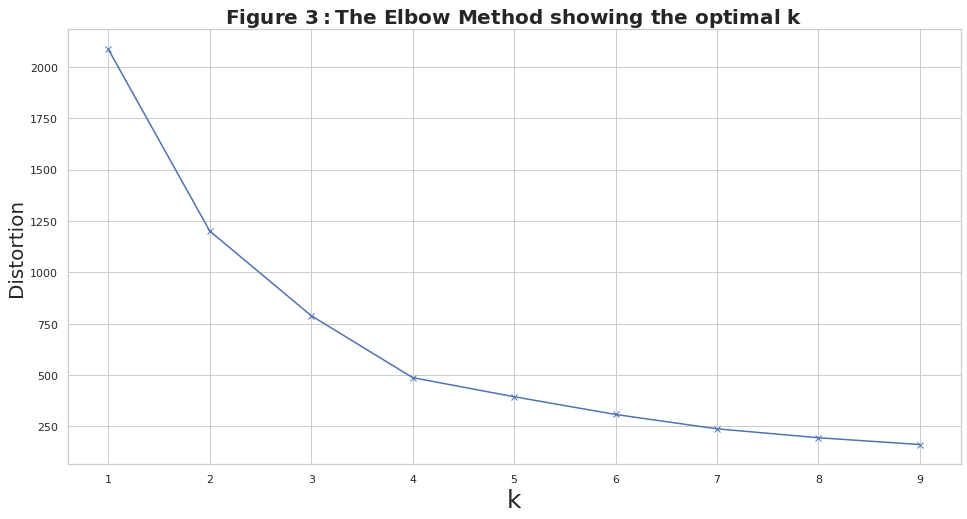

In [230]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', fontsize= 25)
plt.ylabel('Distortion', fontsize= 20)
plt.title(r"$\bf{" + 'Figure \ 3: The \ Elbow \ Method \ showing \ the \ optimal \ k'+ "}$", fontsize= 20)
plt.savefig('Figure3.png')
plt.show()

## Clustering

In [41]:
num_clusters = 5

In [46]:
#Adjusting the dataframe to array
dfCluster2 = dfCluster.values

In [224]:
figure_width, figure_height = 7,7

fig_title = r"$\bf{" + 'Figure \ 4: Clustering \ Between \ White \ and \ Minorities'+ "}$" + "\n" + r"$\bf{" + 'Employment \ Rates'+ "}$"
x_label   = 'White Employment Rate'
y_label   = 'Minorities Employment Rate'
title_fontsize = 13
label_fontsize = 10

x_min, x_max = 0.8*np.min(dfCluster2[:,0]), 1.1*np.max(dfCluster2[:,0])
y_min, y_max = 0.8*np.min(dfCluster2[:,1]), 1.1*np.max(dfCluster2[:,1])

def setup_figure():
    
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel(x_label,fontsize=label_fontsize)
    plt.ylabel(y_label,fontsize=label_fontsize)

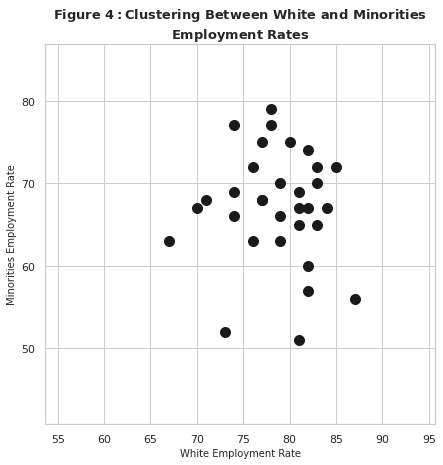

In [225]:
x_values = dfCluster2[:,0]
y_values = dfCluster2[:,1]

#And then a cheeky plot:
plt.figure(0,figsize=(figure_width,figure_height))
setup_figure()
plt.xlabel(x_label,fontsize=label_fontsize)
plt.ylabel(y_label,fontsize=label_fontsize)
plt.title(fig_title,fontsize=title_fontsize)
plt.plot(x_values,y_values, 'k.', markersize=20)

## Performing Clustering

In [82]:
kmeans_output = sklc.KMeans(n_clusters=num_clusters, n_init=1).fit(dfCluster2)

print(kmeans_output)   

KMeans(n_clusters=5, n_init=1)


In [83]:
clustering_ids_kmeans = kmeans_output.labels_

In [84]:
complete_data_with_clusters = np.hstack((dfCluster2,np.array([clustering_ids_kmeans]).T))

In [93]:
data_by_cluster = []

for i in range(num_clusters):
    
    this_data = []
    
    for row in complete_data_with_clusters:
        
        if row[-1] == i:
            this_data.append(row)
    
    this_data = np.array(this_data)
    
    data_by_cluster.append(this_data)
    

data_by_cluster

[array([[76., 72.,  0.],
        [80., 75.,  0.],
        [77., 75.,  0.],
        [74., 77.,  0.],
        [78., 79.,  0.],
        [82., 74.,  0.],
        [78., 77.,  0.]]),
 array([[77., 68.,  1.],
        [81., 67.,  1.],
        [79., 66.,  1.],
        [81., 69.,  1.],
        [79., 70.,  1.],
        [77., 68.,  1.],
        [82., 67.,  1.],
        [83., 65.,  1.],
        [83., 72.,  1.],
        [85., 72.,  1.],
        [81., 65.,  1.],
        [84., 67.,  1.],
        [79., 63.,  1.],
        [83., 70.,  1.]]),
 array([[82., 57.,  2.],
        [82., 60.,  2.],
        [87., 56.,  2.]]),
 array([[81., 51.,  3.],
        [73., 52.,  3.]]),
 array([[71., 68.,  4.],
        [67., 63.,  4.],
        [70., 67.,  4.],
        [74., 69.,  4.],
        [74., 66.,  4.],
        [76., 63.,  4.]])]

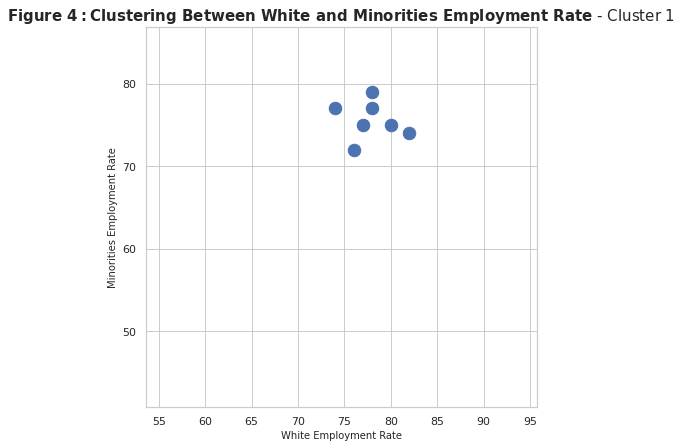

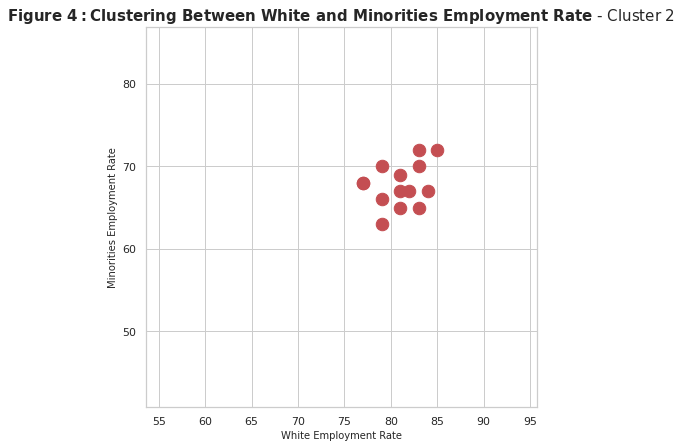

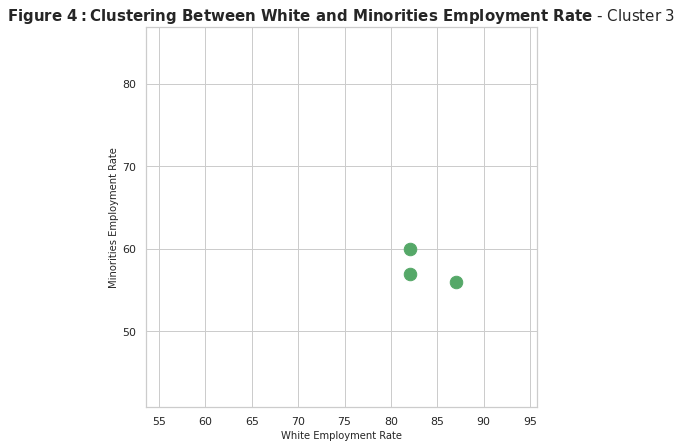

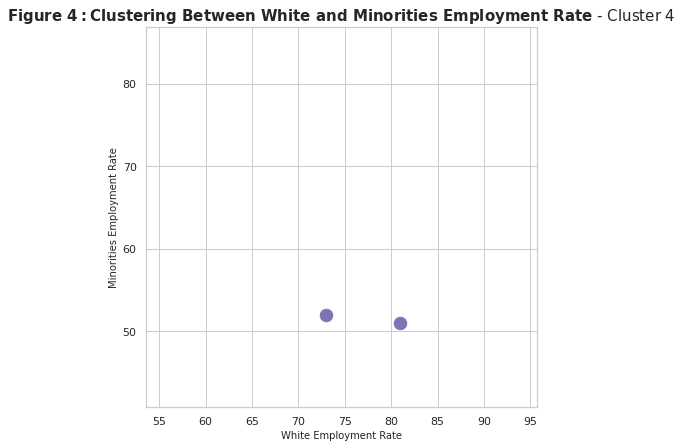

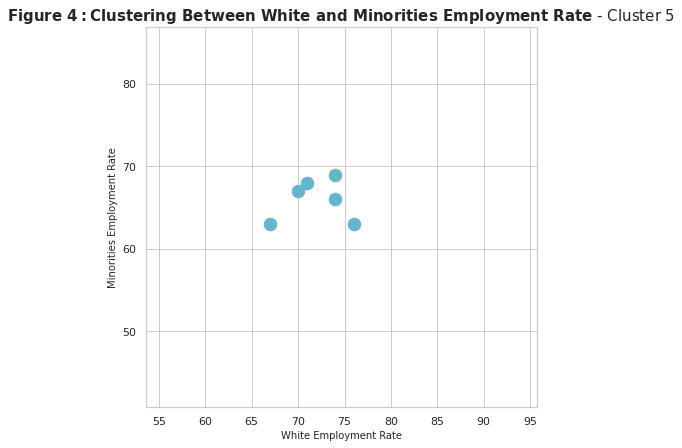

In [100]:
color_list = ['b','r','g','m','c','k','y']

for n in range(num_clusters):
    
    plt.figure(n+1,figsize=(figure_width,figure_height))
    setup_figure()
    plt.title(fig_title + ' - Cluster ' + str(n+1),fontsize=title_fontsize)
    
    x_values = data_by_cluster[n][:,0]
    y_values = data_by_cluster[n][:,1]
    
    plt.plot(x_values,y_values,color_list[n % num_clusters] + '.', markersize=25)

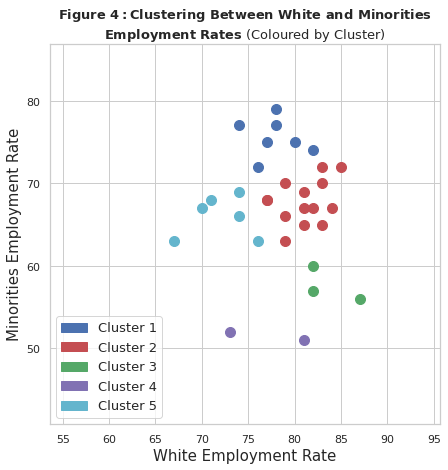

In [227]:
plt.figure(num_clusters + 1,figsize=(figure_width,figure_height))
setup_figure()
plt.title(fig_title + ' (Coloured by Cluster)',fontsize=title_fontsize)

for i in range(num_clusters):
    
    x_values = data_by_cluster[i][:,0]
    y_values = data_by_cluster[i][:,1]
    plt.xlabel('White Employment Rate', fontsize=15)
    plt.ylabel('Minorities Employment Rate', fontsize=15)
    blue_patch = mpatches.Patch(color='b', label='Cluster 1')
    red_patch = mpatches.Patch(color='r', label='Cluster 2')
    purple_patch = mpatches.Patch(color='g', label='Cluster 3')
    green_patch = mpatches.Patch(color='m', label='Cluster 4')
    lightblue_patch = mpatches.Patch(color='c', label='Cluster 5')
    plt.legend(handles=[blue_patch, red_patch, purple_patch, green_patch, lightblue_patch],
               loc= 'lower left', prop={'size': 13})
    
    plt.plot(x_values,y_values,color_list[i % num_clusters] + '.', markersize=20)
    plt.savefig('Figure4.png')

In [119]:
silhouette_kmeans = sklm.silhouette_score(dfCluster2,clustering_ids_kmeans)

print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.39482981852853716
